<a href="https://colab.research.google.com/github/dynasty-29/Kaggle-BIPOC-Program-Projects/blob/main/Travel_Customer_Churn_Prediction_using_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Decision Trees**

A decision tree is a flowchart-like tree structure that is used to make a decision or prediction based on certain input data. It is a type of supervised learning algorithm that can be used in both classification and regression tasks.

The tree is made up of a set of decision nodes and leaf nodes. Decision nodes represent a question or a test on the input data, and the branches from the node represent the possible answers to that question. Leaf nodes represent the final decision or prediction based on the path taken through the tree.

The tree is built by starting at the root node and continually splitting the data based on the most important feature (or features) until the data is pure, meaning that all the data points in a leaf node belong to the same class. The features used to split the data at each decision node are chosen based on a measure of how well they separate the data.

Decision trees are simple to understand and interpret, and they can handle large amounts of data efficiently. However, they can also be prone to overfitting, especially if the tree becomes too deep. To prevent overfitting, decision trees can be pruned by removing unnecessary nodes or by setting a maximum depth for the tree.

**Advantages of decision trees:**

1. Easy to interpret: You can visualize your decision tree and the various nodes in it, which can already provide meaningful insight into the problem you are tackling.
2. Requires minimal data preparation: you will rarely need to fundamentally change your data.
3. Scales very well: As data sets grow in size, creating decision trees remains a comparatively faster process than many of the other models we have seen.


**Challenges with decision trees:**

1. Very prone to overfitting, so creating multiple models with different parameters is key, and dimensionality reduction can be very important.
2. It can be heavily biased by the data set, requiring careful data collection and assessment before building confidence in the model.



For this case study will be exploring Decison trees using data for travel agency customer churn obtained from [kaggle](https://www.kaggle.com/code/suelin/customer-churn-in-travel-industry/data).





In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
travel_data = pd.read_csv('/content/Customertravel.csv')

In [3]:
#PPreviewing data set shape
travel_data.shape

(954, 7)

In [4]:
travel_data.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


In [5]:
#checking for nulls
travel_data.isnull().sum()

Age                           0
FrequentFlyer                 0
AnnualIncomeClass             0
ServicesOpted                 0
AccountSyncedToSocialMedia    0
BookedHotelOrNot              0
Target                        0
dtype: int64

# **EDA**

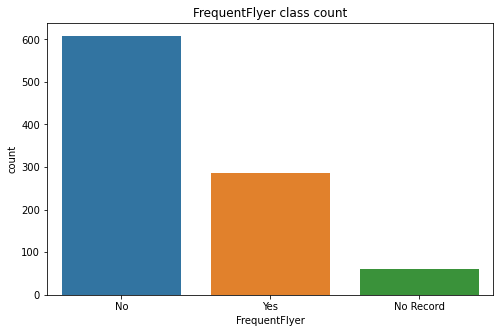

In [6]:
#Previewing Income class count
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(travel_data['FrequentFlyer'], label = "Count", ax=ax).set(
    title="FrequentFlyer class count") 
plt.show()

Most of the customers are not refreuent flyers

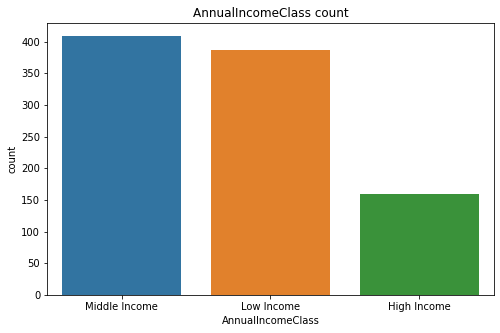

In [7]:
#Previewing Income class count
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(travel_data['AnnualIncomeClass'], label = "Count", ax=ax).set(
    title="AnnualIncomeClass count") 
plt.show()

Most customers are from middle income class with least being from High income class

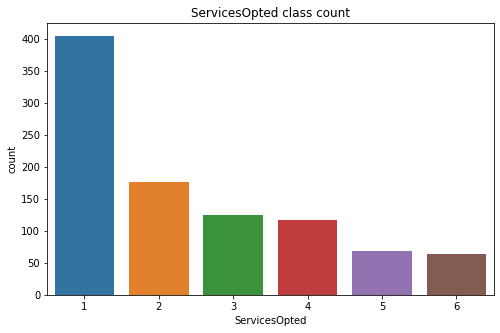

In [8]:
#Previewing Income class count
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(travel_data['ServicesOpted'], label = "Count", ax=ax).set(
    title="ServicesOpted class count") 
plt.show()

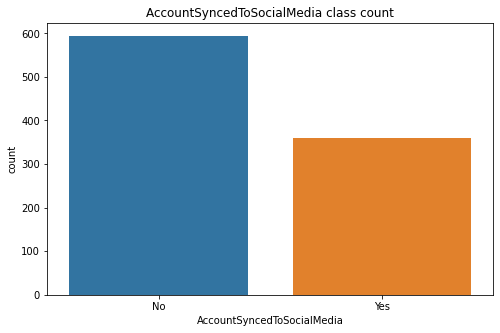

In [9]:
#Previewing Income class count
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(travel_data['AccountSyncedToSocialMedia'], label = "Count", ax=ax).set(
    title="AccountSyncedToSocialMedia class count") 
plt.show()

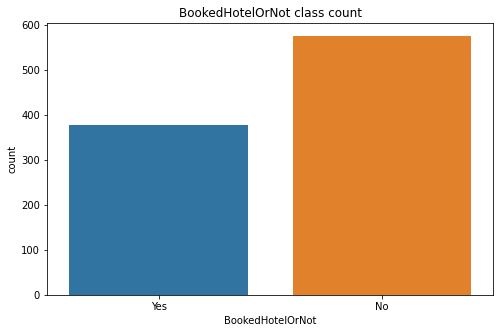

In [10]:
#Previewing Income class count
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(travel_data['BookedHotelOrNot'], label = "Count", ax=ax).set(
    title="BookedHotelOrNot class count") 
plt.show()

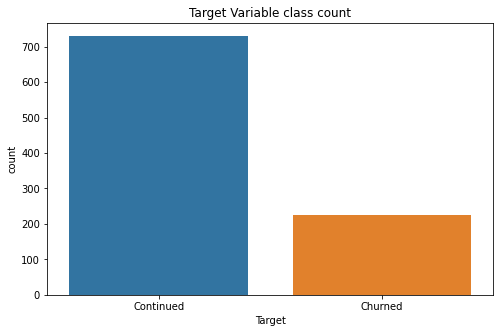

In [11]:
# 1 is for customers who continued with the agency while 1 is for churstomers who churned.

travel_data['Target'] = travel_data.Target.map({0: 'Continued', 1 : 'Churned'})

#Previewing Income class count
fig, ax = plt.subplots(figsize=(8, 5))
sns.countplot(travel_data['Target'], label = "Count", ax=ax).set(
    title="Target Variable class count") 
plt.show()

There were less customers who churned compared to those who continued.


## *Comparing Churn/Continued with other variables*

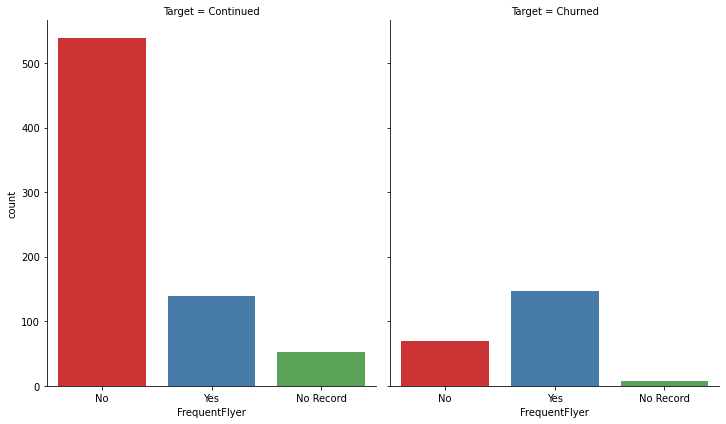

In [12]:
sns.catplot("FrequentFlyer", col="Target", col_wrap=20, data=travel_data, kind="count", height=6, aspect=.8, palette='Set1')
plt.show()


More frequent flers churned compared to those who didn't

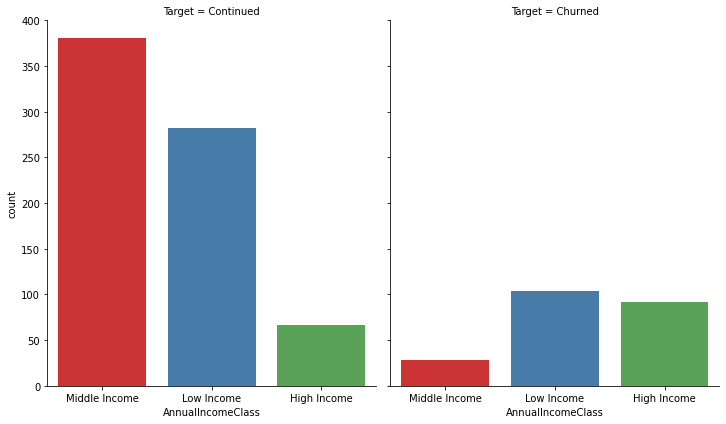

In [13]:
sns.catplot("AnnualIncomeClass", col="Target", col_wrap=20, data=travel_data, kind="count", height=6, aspect=.8, palette='Set1')
plt.show()

Highest proportion of people who churned were from low income class

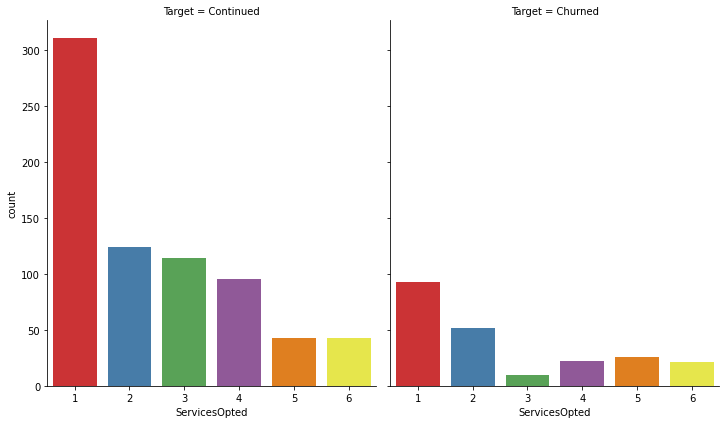

In [14]:
sns.catplot("ServicesOpted", col="Target", col_wrap=20, data=travel_data, kind="count", height=6, aspect=.8, palette='Set1')
plt.show()

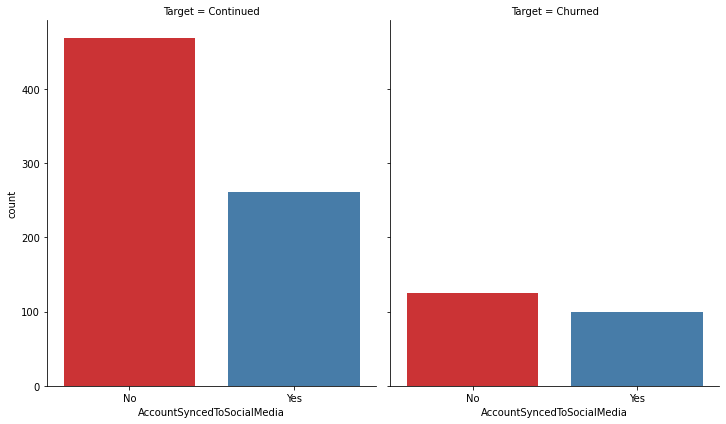

In [15]:
sns.catplot("AccountSyncedToSocialMedia", col="Target", col_wrap=20, data=travel_data, kind="count", height=6, aspect=.8, palette='Set1')
plt.show()

Highest customers who synced their account to social media didn't churn

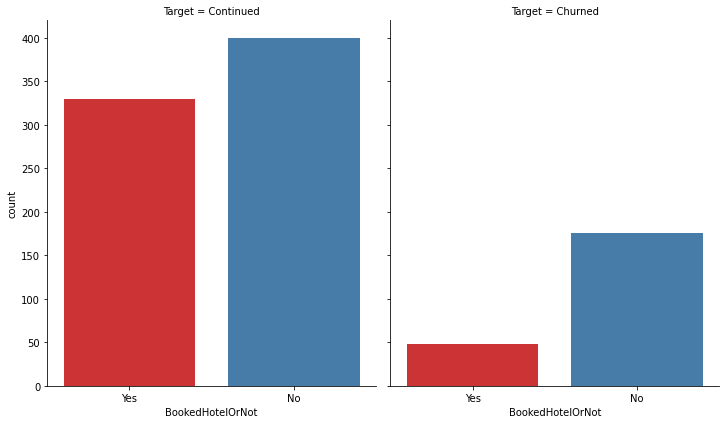

In [16]:
sns.catplot("BookedHotelOrNot", col="Target", col_wrap=20, data=travel_data, kind="count", height=6, aspect=.8, palette='Set1')
plt.show()

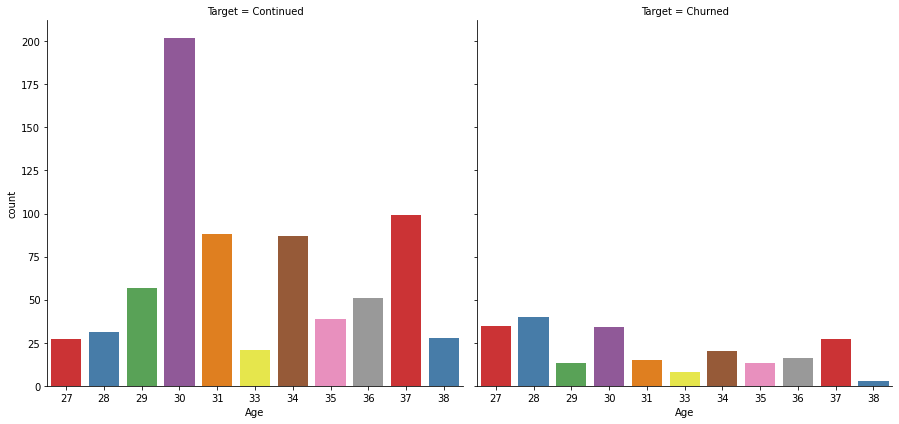

In [17]:
sns.catplot("Age", col="Target", col_wrap=20, data=travel_data, kind="count", height=6, aspect=1, palette='Set1')
plt.show()

The age groups where most people churned were 28, 30, 27 and 37.

Label encoding our categorical variables

In [18]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column .
travel_data['FrequentFlyer']= label_encoder.fit_transform(travel_data['FrequentFlyer'])
travel_data['AnnualIncomeClass']= label_encoder.fit_transform(travel_data['AnnualIncomeClass'])
travel_data['AccountSyncedToSocialMedia']= label_encoder.fit_transform(travel_data['AccountSyncedToSocialMedia'])  
travel_data['BookedHotelOrNot']= label_encoder.fit_transform(travel_data['BookedHotelOrNot'])  
travel_data['Target']= label_encoder.fit_transform(travel_data['Target'])  

travel_data.head(3)

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,0,2,6,0,1,1
1,34,2,1,5,1,0,0
2,37,0,2,3,1,0,1


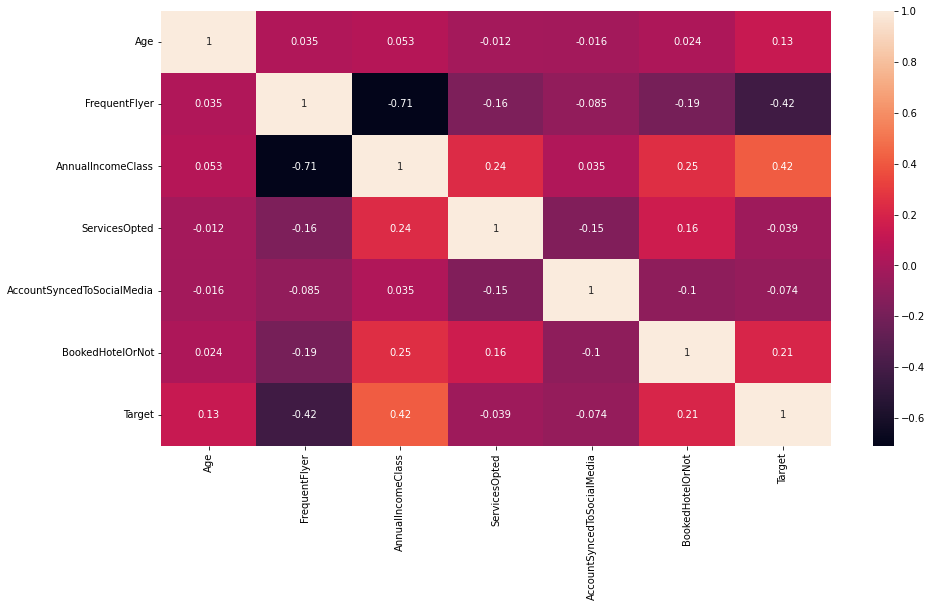

In [19]:
#showing correlation on a heatmap

plt.figure(figsize=(15,8))
sns.heatmap(travel_data.corr(),annot=True)
plt.show()

There is no multicorrelation between variables which is a good thing.
Now we go to modeling

# **Modeling**


Like mentioned earlier there are two types of decision trees.
1. Classification trees

Tree models where the target variable can take a discrete set of values. In these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels.

2. Regression trees

Decision trees where the target variable can take continuous values (real numbers) like the price of a house, or a patient’s length of stay in a hospital.


For our case study will be using the classification approach.

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


In [21]:
travel_data.columns

Index(['Age', 'FrequentFlyer', 'AnnualIncomeClass', 'ServicesOpted',
       'AccountSyncedToSocialMedia', 'BookedHotelOrNot', 'Target'],
      dtype='object')

In [22]:
#First we separate our target variable from our predictor variables
y = travel_data['Target'].values

test_features = ['Age', 'FrequentFlyer', 'AnnualIncomeClass', 'ServicesOpted', 'AccountSyncedToSocialMedia', 'BookedHotelOrNot']

X = travel_data[test_features].values

In [23]:
# Splitting dataset to train and test sets 80% train and 20% test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=0)

In [24]:
# Create a decision tree classifier

tree = DecisionTreeClassifier()

# Train it on our training set.
tree = tree.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = tree.predict(X_test)


from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.8481675392670157


In [25]:
# And now we assess the errors
from sklearn.metrics import classification_report
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Report : ",
    classification_report(y_test, y_pred))

Report :                precision    recall  f1-score   support

           0       0.68      0.60      0.63        42
           1       0.89      0.92      0.90       149

    accuracy                           0.85       191
   macro avg       0.78      0.76      0.77       191
weighted avg       0.84      0.85      0.84       191



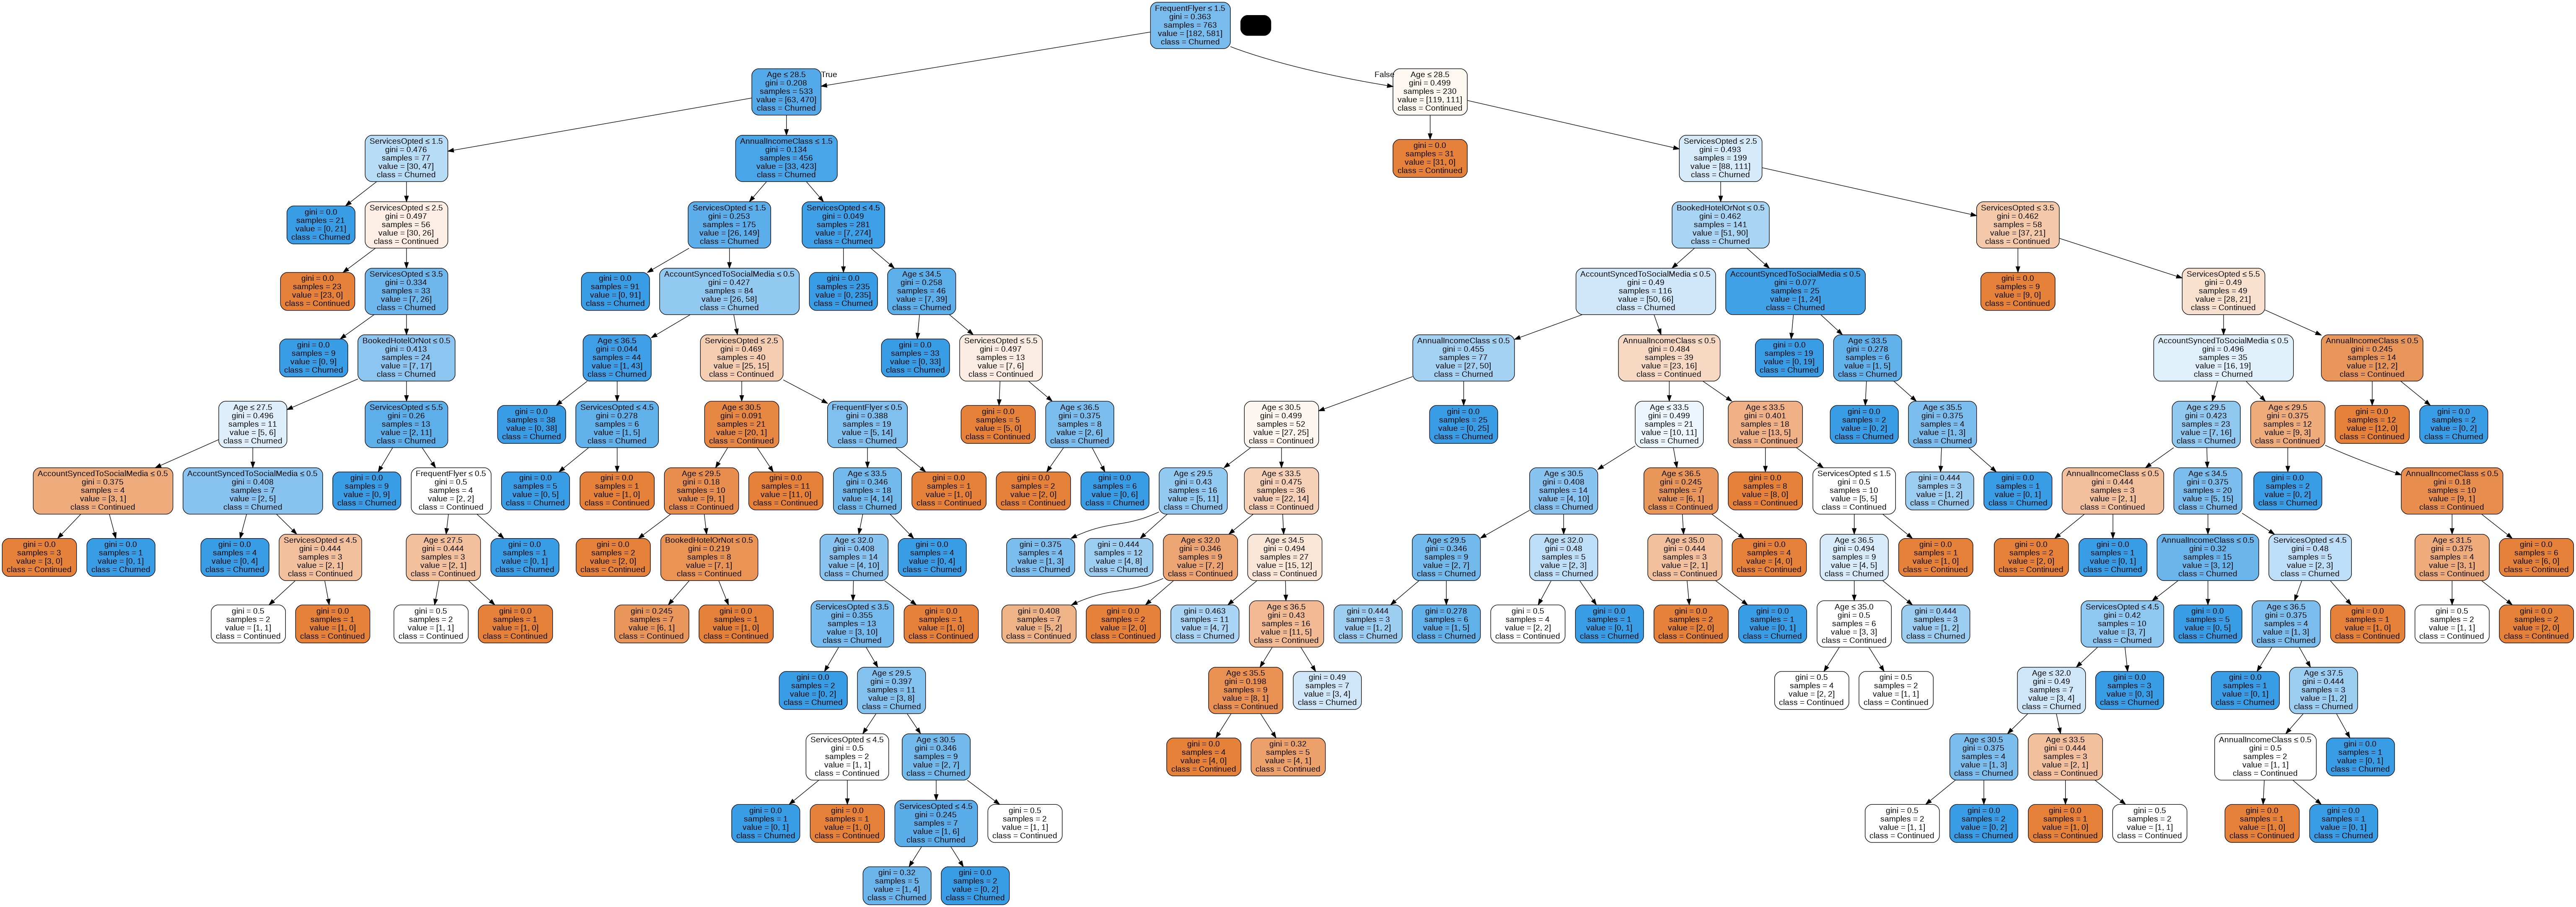

In [26]:
import six
import sys
from six import StringIO
from sklearn.tree import export_graphviz

from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features,class_names=['Continued', 'Churned'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Churn.png')
Image(graph.create_png())

### **Hyper parameter tuning**


Some of the hyperparameters tuned in decison trees are:

1. Maximum tree depth: This hyperparameter controls the maximum number of layers in the tree. Deeper trees are more complex and may have a higher risk of overfitting. As you can see our diagram above is not readable clearly since we have not set any tree depth so it gave us all trees.

2. Minimum samples per leaf: This hyperparameter controls the minimum number of samples that can be present in a leaf node. Smaller values may lead to deeper trees and more complex models, while larger values may lead to simpler models.

3. Minimum samples per split: This hyperparameter controls the minimum number of samples required to split an internal node. Smaller values may lead to deeper trees and more complex models, while larger values may lead to simpler models.

To tune these hyperparameters, you can use a technique called: 

a.** Grid search**, which involves specifying a range of values for each hyperparameter and training a model for each combination of hyperparameter values. You can then evaluate the performance of each model and choose the combination of hyperparameter values that gives the best performance. 

b. **Entropy and Gini index** are used as measures of impurity in a node. When building a decision tree, the goal is to partition the data into homogeneous subgroups. The entropy or Gini index of a node is a measure of how pure or homogeneous the node is. A pure node is one where all the samples belong to the same class, while a node with high impurity contains a mixture of different classes.

Entropy is calculated using the following formula:

    Entropy = -∑p(i)log2p(i)

Where p(i) is the proportion of samples belonging to class i in the node.

Gini index is calculated using the following formula:

    Gini index = ∑p(i)(1-p(i))

Where p(i) is the proportion of samples belonging to class i in the node.

When building a decision tree, the algorithm tries to find the split that reduces the entropy or Gini index the most. The choice between using entropy or Gini index is often a matter of personal preference, as both measures can produce similar results. Some decision tree algorithms allow you to specify which impurity measure to use, while others use a default measure.

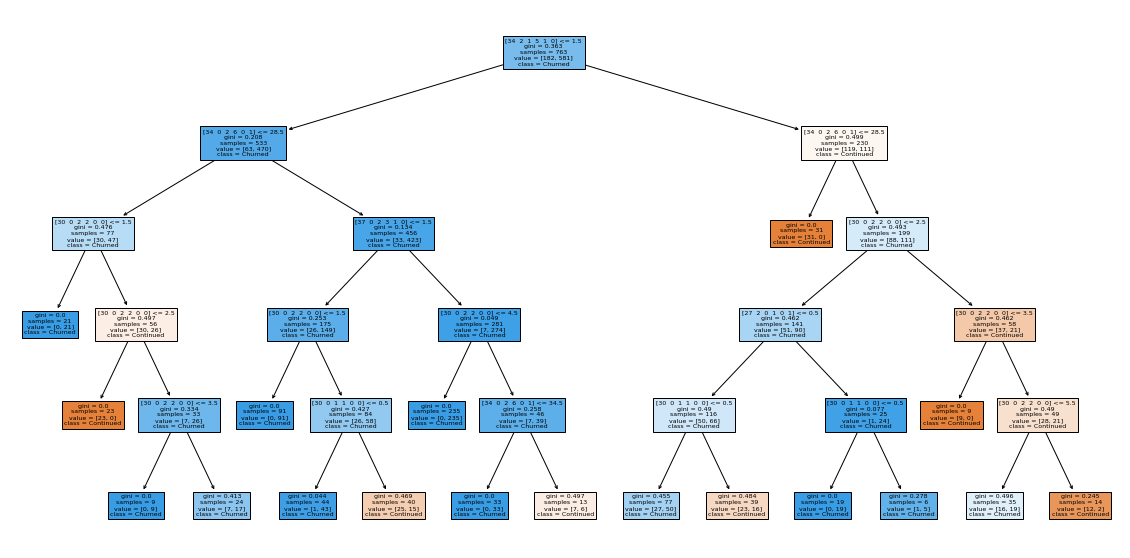

In [27]:
#Setting a maximum depth
dt_mx = DecisionTreeClassifier(max_depth=5)
dt_mx.fit(X_train, y_train)
from sklearn import tree
fig = plt.figure(figsize=(20,10))
_ = tree.plot_tree(dt_mx,
                   feature_names=X,
                   class_names=['Continued', "Churned"],
                   filled=True)

In [28]:
#Model evaluation
y_test_pred = dt_mx.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Report : ",
    classification_report(y_test, y_test_pred))

Report :                precision    recall  f1-score   support

           0       0.64      0.64      0.64        42
           1       0.90      0.90      0.90       149

    accuracy                           0.84       191
   macro avg       0.77      0.77      0.77       191
weighted avg       0.84      0.84      0.84       191



Our model metrics still remain the same as baseline model

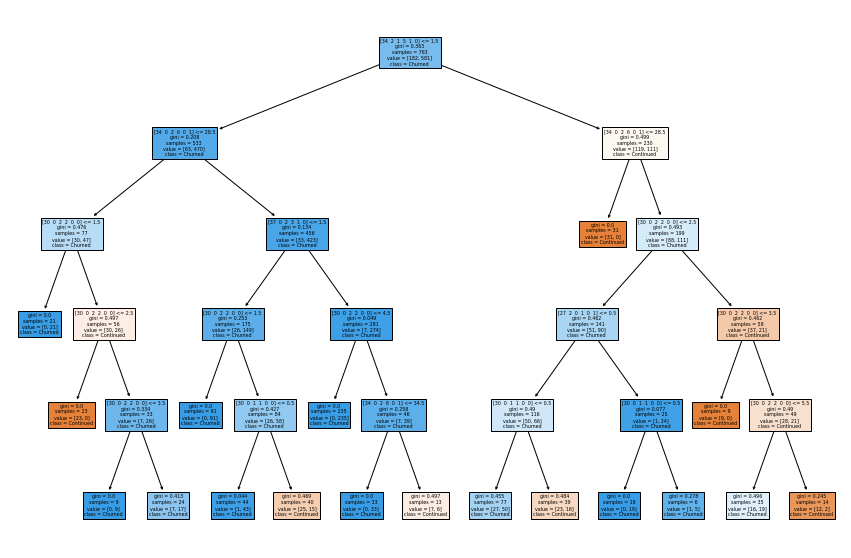

In [29]:
#Applying max and minimumm depth 
dt_mxmn = DecisionTreeClassifier(max_depth=5, min_samples_split=20)
dt_mxmn.fit(X_train, y_train)
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(dt_mxmn,
                   feature_names=X,
                   class_names=['Continued', "Churned"],
                   filled=True)

In [30]:
#Model evaluation
y_test_pred_mxmn = dt_mxmn.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Report : ",
    classification_report(y_test, y_test_pred_mxmn))

Report :                precision    recall  f1-score   support

           0       0.64      0.64      0.64        42
           1       0.90      0.90      0.90       149

    accuracy                           0.84       191
   macro avg       0.77      0.77      0.77       191
weighted avg       0.84      0.84      0.84       191



Still same as baseline

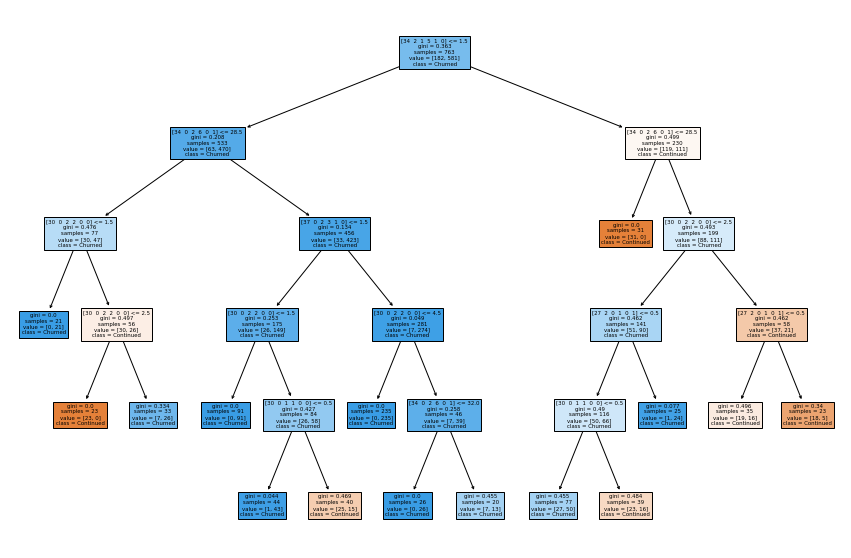

In [31]:
#Applying max, min depth an no of leafs
dt_min_leaf = DecisionTreeClassifier(max_depth=5, min_samples_split=20, 
                                     min_samples_leaf=20, random_state=42)
dt_min_leaf.fit(X_train, y_train)
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(dt_min_leaf,
                   feature_names=X,
                   class_names=['Continued', "Churned"],
                   filled=True)

In [32]:
#Model evaluation
y_test_pred_mxmn = dt_min_leaf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Report : ",
    classification_report(y_test, y_test_pred_mxmn))

Report :                precision    recall  f1-score   support

           0       0.70      0.67      0.68        42
           1       0.91      0.92      0.91       149

    accuracy                           0.86       191
   macro avg       0.80      0.79      0.80       191
weighted avg       0.86      0.86      0.86       191



Improved a bit 

In [33]:
#Appplying all hyperparameter tunes
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [34]:
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [35]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [36]:
#Identifying the best parameters
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=42)

In [39]:
#evaluating our model using best parameters
dt_best_model = grid_search.best_estimator_


#Model evaluation
y_test_best = dt_best_model.predict(X_test)

#
print("Report : ",
    classification_report(y_test, y_test_best))

Report :                precision    recall  f1-score   support

           0       0.67      0.62      0.64        42
           1       0.89      0.91      0.90       149

    accuracy                           0.85       191
   macro avg       0.78      0.77      0.77       191
weighted avg       0.84      0.85      0.85       191



Taking into consideration of all parameters involved and features this is the best of our model with an accuracy of 85%